In [1]:
# import pandas as pd
# import os
# import glob
# import concurrent.futures
# import time

# directory = 'C:\\Users\\Trieu Pham\\Desktop\\230105 Payment Summary - 2023-01-06T085450.177'
# directory2 = 'C:\\Users\\trieu.pham\\Desktop\\230105 Payment Summary - 2023-01-06T085450.177'
# cate_dir = 'C:\\Users\\Trieu Pham\\Desktop\\DataCate.xlsx'
# cate_dir2 = 'C:\\Users\\trieu.pham\\Desktop\\DataCate.xlsx'

# # list of Excel files to read data from
# if os.path.exists(os.path.join(directory, '230101 Payment Summary - 2023-01-03T093340.600.xlsx')):
#     excel_files = glob.glob(os.path.join(directory, '*.xlsx'))
# else:
#     excel_files = glob.glob(os.path.join(directory2, '*.xlsx'))
# try:
#     # use cols 0, Barcode; 2, Category Name
#     # df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,3])
#     pass
# except FileNotFoundError:
#     # df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,3])
#     pass
# # create an empty list to store the dataframes
# # dfs = [] sho

# # def excel2csv
# def excel2csv(file):
#     file_path = 'data.csv'
#     # Check if exist file_path
#     if not os.path.exists(file_path):
#         with open(file_path, 'w') as f:
#             pass

#     # Read the first line of the file
#     with open(file_path, 'r') as f:
#         first_line = f.readline().strip()
#     # Check if the first line contains the expected column names
#     has_headers = 'InvoiceID' in first_line
#     df = pd.read_excel(file, sheet_name='Sheet2', skiprows=2, usecols=[4,7])
#     # df2 Category
    
#     # merge with Category, on "Barcode"
#     df = df.merge(df2, on='Barcode', how='left')
    
#     # Check if the first line contains the expected column names
#     df.to_csv('data.csv', mode='a', header= not has_headers, index=False)


# # loop through the list of Excel files
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     [executor.submit(excel2csv, file) for file in excel_files]
#     # for file in excel_files:
#     #     executor.submit(excel2csv,file)

In [1]:
# !pip install mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample data
try:
    df1 = pd.read_csv(r'C:\Users\Trieu Pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM1.csv', 
                      on_bad_lines = 'warn')
except FileNotFoundError:
    df1 = pd.read_csv(r'C:\Users\trieu.pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM1.csv', 
                      on_bad_lines = 'warn')

# Get data from Invoice ID with Barcode
df1 = df1[['InvoiceID','SubCategory Name']]

df1 = df1[df1.groupby('InvoiceID')['SubCategory Name'].transform('size') > 1]
dataset_str = df1
dataset_str = df1.groupby('InvoiceID').agg({
    'SubCategory Name': lambda x: ','.join(str(i) for i in x)
}).reset_index()

C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_20244\3206709353.py:8: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'C:\Users\Trieu Pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM1.csv',


In [30]:
dataset_str

,InvoiceID,SubCategory Name
0,VN0001010101230001,"Mineral water,Mineral water"
1,VN0001010101230002,"Purified water,Purified water"
2,VN0001010101230003,"Other Ice Cream,Potato Snacks,Stick,UHT Milk,M..."
3,VN0001010101230004,"Distilled Spirits,Cup Of Ice,Add-on item Sub,D..."
4,VN0001010101230005,"Sports Drinks Sub,Sports Drinks Sub,Sports Dri..."
...,...,...
1292416,VN9996023001230524,"Purified water,Energy Drinks Sub"
1292417,VN9996023001230535,"Sugar CSD,Instant Sausage"
1292418,VN9996023001230536,"Sports Drinks Sub,No/Less Sugar CSD"
1292419,VN9996023001230537,"Sugar CSD,Onigiri,Cup Of Ice,Salty Snacks,Nuts..."


In [31]:
dataset_str['StoreID'] = dataset_str['InvoiceID'].map(lambda x: x[:6])

In [32]:
dataset_str

,InvoiceID,SubCategory Name,StoreID
0,VN0001010101230001,"Mineral water,Mineral water",VN0001
1,VN0001010101230002,"Purified water,Purified water",VN0001
2,VN0001010101230003,"Other Ice Cream,Potato Snacks,Stick,UHT Milk,M...",VN0001
3,VN0001010101230004,"Distilled Spirits,Cup Of Ice,Add-on item Sub,D...",VN0001
4,VN0001010101230005,"Sports Drinks Sub,Sports Drinks Sub,Sports Dri...",VN0001
...,...,...,...
1292416,VN9996023001230524,"Purified water,Energy Drinks Sub",VN9996
1292417,VN9996023001230535,"Sugar CSD,Instant Sausage",VN9996
1292418,VN9996023001230536,"Sports Drinks Sub,No/Less Sugar CSD",VN9996
1292419,VN9996023001230537,"Sugar CSD,Onigiri,Cup Of Ice,Salty Snacks,Nuts...",VN9996


In [33]:
# Select StoreID, Example VN0001; Comment below if you want to get all data
dataset_str = dataset_str[dataset_str['StoreID'] == 'VN0001']

In [34]:
# Transform the data into a list of lists (transactions) with TransactionEncoder
# create a TransactionEncoder object
data = dataset_str[['SubCategory Name']]

data = data.values.tolist()

data = [x[0].split(',') for x in data]

te = TransactionEncoder()

# transform the data into a list of lists
transactions = te.fit(data).transform(data)
transactions = pd.DataFrame(transactions, columns=te.columns_)

transactions

,Add-on item Sub,Alternative Snacks,Babycare sub,Batteries Sub,Bento,Bingsu,Body Care,Can food,Cereal,Chilled Ready to eat Sub,...,Toothbrush,Toothpaste,Toys Candy,UHT Milk,Vegetarian food,WIC/RIC Juice,Wafflers,Wearables/Apparel/Umbrella,Western Coffee,nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9066,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9067,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9068,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# Calculate frequent itemsets using Apriori algorithm

frequent_itemsets = apriori(transactions, min_support=0.005, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.040132,(Add-on item Sub)
1,0.013671,(Alternative Snacks)
2,0.021610,(Bento)
3,0.042889,(Chocolate Bar)
4,0.016979,(Chocolate Pack)
...,...,...
141,0.005292,"(Purified water, Sugar CSD)"
142,0.009041,"(Purified water, Sugar Tea)"
143,0.005954,"(Sugar Tea, Savoury Buns)"
144,0.009372,"(Sugar Tea, Sugar CSD)"


In [36]:
# 1. Support: It is the total number of transactions made for a particular product divided by the total number of transactions made. Zero represents no support while one represents the highest support. 
# Higher the value of support, the greater the importance of the itemset in the data.

# support(A⇒ B) =P(A ∪ B)

# Support (Books) = Freq (Books)/Total transactions made

# Support (Books) = 6/100 = 0.06%

# 2. Confidence: It is the ratio of combined transactions to individual transactions.

# confidence(A⇒ B) =P(B|A)

# Confidence (Books) = Combined transactions/Individual transaction

# Confidence (Books) = 0.06/0.08 = 0.75

# 3. Lift: It is the ratio of the confidence percent to the support percent.

# Lift = 0.75/0.10 = 7.5

# If the value of lift < 1, the combination is not bought by consumers frequently.
# If the value of lift >1, the combination is brought frequently by the consumers.
# If the value of lift = 1, then the purchase of antecedent makes no difference on the consequent.

# 4. Zhang Metric
# -1 to 1
# The Zhang Metric is a metric that ranges from -1 to 1 to represent both positive association and perfect disassociation. 
# This is a useful metric if there are specific items that you should never put next to each other, even though they have been purchased previously.

# Generate association rules from the frequent itemsets


rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Add-on item Sub),(Chocolate Bar),0.040132,0.042889,0.005402,0.134615,3.138719,0.003681,1.105995,0.709888
1,(Chocolate Bar),(Add-on item Sub),0.042889,0.040132,0.005402,0.125964,3.138719,0.003681,1.098202,0.711932
2,(Add-on item Sub),(Flavored Milk Sub),0.040132,0.067034,0.012238,0.304945,4.549098,0.009548,1.342291,0.812796
3,(Flavored Milk Sub),(Add-on item Sub),0.067034,0.040132,0.012238,0.182566,4.549098,0.009548,1.174245,0.836232
4,(Add-on item Sub),(Instant Noodles Pack),0.040132,0.044983,0.005843,0.145604,3.236843,0.004038,1.117769,0.719950
...,...,...,...,...,...,...,...,...,...,...
125,(Savoury Buns),(Sugar Tea),0.078831,0.110695,0.005954,0.075524,0.682278,-0.002773,0.961957,-0.335782
126,(Sugar Tea),(Sugar CSD),0.110695,0.058434,0.009372,0.084661,1.448827,0.002903,1.028653,0.348347
127,(Sugar CSD),(Sugar Tea),0.058434,0.110695,0.009372,0.160377,1.448827,0.002903,1.059173,0.329012
128,(WIC/RIC Juice),(Sugar Tea),0.027563,0.110695,0.006505,0.236000,2.131992,0.003454,1.164012,0.546005


In [37]:
rules['conviction'] = (1 - rules['support']) / (1 - rules['confidence'])

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Add-on item Sub),(Chocolate Bar),0.040132,0.042889,0.005402,0.134615,3.138719,0.003681,1.149313,0.709888
1,(Chocolate Bar),(Add-on item Sub),0.042889,0.040132,0.005402,0.125964,3.138719,0.003681,1.137937,0.711932
2,(Add-on item Sub),(Flavored Milk Sub),0.040132,0.067034,0.012238,0.304945,4.549098,0.009548,1.421128,0.812796
3,(Flavored Milk Sub),(Add-on item Sub),0.067034,0.040132,0.012238,0.182566,4.549098,0.009548,1.208369,0.836232
4,(Add-on item Sub),(Instant Noodles Pack),0.040132,0.044983,0.005843,0.145604,3.236843,0.004038,1.163579,0.719950
...,...,...,...,...,...,...,...,...,...,...
125,(Savoury Buns),(Sugar Tea),0.078831,0.110695,0.005954,0.075524,0.682278,-0.002773,1.075254,-0.335782
126,(Sugar Tea),(Sugar CSD),0.110695,0.058434,0.009372,0.084661,1.448827,0.002903,1.082253,0.348347
127,(Sugar CSD),(Sugar Tea),0.058434,0.110695,0.009372,0.160377,1.448827,0.002903,1.179850,0.329012
128,(WIC/RIC Juice),(Sugar Tea),0.027563,0.110695,0.006505,0.236000,2.131992,0.003454,1.300386,0.546005


In [38]:
# %pip install plotly

rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

import plotly.express as px
# install plotly: pip install plotly
# install nbformat: pip install nbformat
fig = px.scatter(rules, x='support', y='confidence', size='lift', 
                 hover_data=['antecedents', 'consequents'])
fig.show()

In [39]:
# Display the association rules with support, lift, and confidence
import time
print(rules[['antecedents', 'consequents', 'support', 'lift', 'confidence']])
rules[['antecedents', 'consequents', 'support', 'lift', 'confidence']].to_csv('result.csv', index=False)

             antecedents             consequents   support      lift   
0      [Add-on item Sub]         [Chocolate Bar]  0.005402  3.138719  \
1        [Chocolate Bar]       [Add-on item Sub]  0.005402  3.138719   
2      [Add-on item Sub]     [Flavored Milk Sub]  0.012238  4.549098   
3    [Flavored Milk Sub]       [Add-on item Sub]  0.012238  4.549098   
4      [Add-on item Sub]  [Instant Noodles Pack]  0.005843  3.236843   
..                   ...                     ...       ...       ...   
125      [Savoury  Buns]             [Sugar Tea]  0.005954  0.682278   
126          [Sugar Tea]             [Sugar CSD]  0.009372  1.448827   
127          [Sugar CSD]             [Sugar Tea]  0.009372  1.448827   
128      [WIC/RIC Juice]             [Sugar Tea]  0.006505  2.131992   
129          [Sugar Tea]         [WIC/RIC Juice]  0.006505  2.131992   

     confidence  
0      0.134615  
1      0.125964  
2      0.304945  
3      0.182566  
4      0.145604  
..          ...  
125    0.

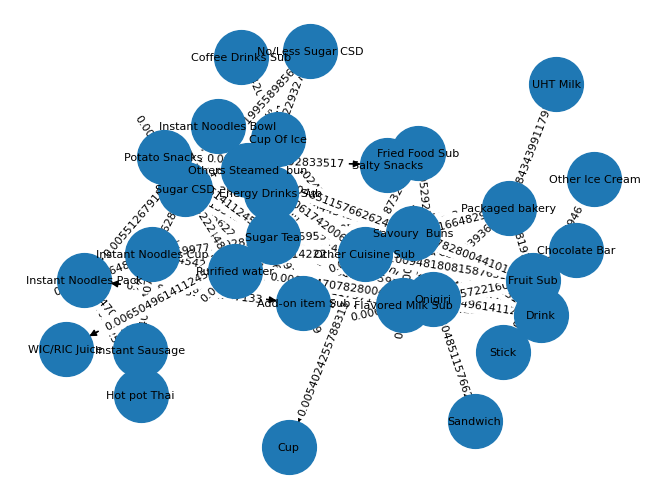

In [45]:
# Check if networkx and matplotlib are installed
# !pip install networkx
# !pip install matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Iterate through each row of the DataFrame and add edges to the graph
for index, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    
    # Add edges to the graph with the support or confidence as edge weight
    G.add_edge(antecedent, consequent, weight=support)

# Draw the graph using spring layout and label edges with their weights
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=8)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
plt.show()


In [41]:
import plotly.graph_objects as go
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Iterate through each row of the DataFrame and add edges to the graph
for index, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    conviction = row['conviction']

    # Add edges to the graph with the support or confidence as edge weight
    G.add_edge(antecedent, consequent, weight=support)

# Get the node positions using spring layout
pos = nx.spring_layout(G)

# Create a list of edge traces
edge_traces = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = G.get_edge_data(edge[0], edge[1])['weight']
    edge_trace = go.Scatter(x=[x0, x1, None], y=[y0, y1, None],
                            mode='lines', line=dict(width=weight*10, color='black'),
                            hoverinfo='none')
    edge_traces.append(edge_trace)

# Create a list of node traces
node_traces = []
for node in G.nodes():
    x, y = pos[node]
    node_trace = go.Scatter(x=[x], y=[y], mode='markers+text', text=node,
                            textposition='top center', marker=dict(size=40, color='lightblue'))
    node_traces.append(node_trace)

# Create the figure and add the edge and node traces
fig = go.Figure(data=edge_traces + node_traces)

# Set the layout properties
fig.update_layout(title='Items Set Rules Graph', title_x=0.5, showlegend=False, hovermode='closest',
                  plot_bgcolor='white', margin=dict(b=20, l=5, r=5, t=40), xaxis=dict(showgrid=False, zeroline=False,
                  showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Show the plot
fig.show()


In [42]:
import plotly.graph_objects as go
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Iterate through each row of the DataFrame and add edges to the graph
for index, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    conviction = row['conviction']
    # Check if lift is greater than 2 and confidence is greater than 0.1
    if lift >= 2 and confidence > 0.1:
        # Add edges to the graph with the support or confidence as edge weight
        G.add_edge(antecedent, consequent, weight=support)

        # Add support, lift, and confidence as attributes to the nodes
        G.add_node(antecedent, support=support, lift=lift, confidence=confidence, conviction=conviction)
        G.add_node(consequent, support=support, lift=lift, confidence=confidence, conviction=conviction)

# Get the node positions using spring layout
pos = nx.spring_layout(G)

# Create a list of edge traces
edge_traces = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = G.get_edge_data(edge[0], edge[1])['weight']
    edge_trace = go.Scatter(x=[x0, x1, None], y=[y0, y1, None],
                            mode='lines', line=dict(width=weight*10, color='black'),
                            hoverinfo='text',
                            hovertext=f"Support: {weight:.3f}",
                            )
    edge_traces.append(edge_trace)

# Create a list of node traces
node_traces = []
for node in G.nodes():
    x, y = pos[node]
    in_edges = G.in_edges(node)
    out_edges = G.out_edges(node)
    text = f"Item: {node}<br>"
    for in_edge in in_edges:
        antecedent = in_edge[0]
        weight = G.get_edge_data(antecedent, node)['weight']
        text += f"Trigger {antecedent} - {node}, Support: {weight:.3f}, Lift: {G.nodes[node]['lift']:.3f}, Confidence: {G.nodes[node]['confidence']:.3f}, Conviction: {G.nodes[node]['conviction']:.3f}<br>"
    for out_edge in out_edges:
        consequent = out_edge[1]
        weight = G.get_edge_data(node, consequent)['weight']
        text += f"Trigger {node} - {consequent}, Support: {weight:.3f}, Lift: {G.nodes[node]['lift']:.3f}, Confidence: {G.nodes[node]['confidence']:.3f}, Conviction: {G.nodes[node]['conviction']:.3f}<br>"
    node_trace = go.Scatter(x=[x], y=[y], mode='markers+text', text=node,
                            marker=dict(size=40, color='lightblue'),
                            hoverinfo='text',
                            hovertext=text
                            )
    node_traces.append(node_trace)

# Create the figure and add the edge and node traces
fig = go.Figure(data=edge_traces + node_traces)

# Set the layout properties
fig.update_layout(title='Items Set Rules Graph', title_x=0.5, showlegend=False, hovermode='closest',
                  plot_bgcolor='white', margin=dict(b=20, l=5, r=5, t=40), xaxis=dict(showgrid=False, zeroline=False,
                  showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Show the plot
fig.show()


In [44]:
import plotly.graph_objects as go
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Iterate through each row of the DataFrame and add edges to the graph
for index, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    conviction = row['conviction']
    # Check if lift is greater than 2 and confidence is greater than 0.1
    if lift >= 2 and confidence > 0.1:
        # Add edges to the graph with the support or confidence as edge weight
        G.add_edge(antecedent, consequent, weight=support)

        # Add support, lift, and confidence as attributes to the nodes
        G.add_node(antecedent, support=support, lift=lift, confidence=confidence, conviction=conviction)
        G.add_node(consequent, support=support, lift=lift, confidence=confidence, conviction=conviction)

# Get the node positions using spring layout
pos = nx.spring_layout(G)

# Create a list of edge traces
edge_traces = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = G.get_edge_data(edge[0], edge[1])['weight']
    # Get both trigger ways
    trigger_way1 = f"{edge[0]} - {edge[1]}"
    trigger_way2 = f"{edge[1]} - {edge[0]}"
    edge_trace = go.Scatter(x=[x0, x1, None], y=[y0, y1, None],
                            mode='lines', line=dict(width=weight*10, color='black'),
                            hoverinfo='text',
                            hovertext=f"{trigger_way1}, {trigger_way2}, Support: {weight:.6f}, Lift: {G.nodes[edge[0]]['lift']:.6f}, Confidence: {G.nodes[edge[0]]['confidence']:.6f}, Conviction: {G.nodes[edge[0]]['conviction']:.6f}"
                            )
    edge_traces.append(edge_trace)

# Create a list of node traces
node_traces = []
for node in G.nodes():
    x, y = pos[node]
    node_trace = go.Scatter(x=[x], y=[y], mode='markers+text', text=node,
                            textposition='top center', marker=dict(size=40, color='lightblue'),
                            hoverinfo='text',
                            hovertext=f"Item: {node}, Support: {G.nodes[node]['support']:.6f}, Lift: {G.nodes[node]['lift']:.6f}, Confidence: {G.nodes[node]['confidence']:.6f}, Conviction: {G.nodes[node]['conviction']:.6f}"
                            )
    node_traces.append(node_trace)

# Create the figure and add the edge and node traces
fig = go.Figure(data=edge_traces + node_traces)

# Set the layout properties
fig.update_layout(title='Items Set Rules Graph', title_x=0.5, showlegend=False, hovermode='closest',
                  plot_bgcolor='white', margin=dict(b=20, l=5, r=5, t=40), xaxis=dict(showgrid=False, zeroline=False,
                  showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Show the plot
fig.show()


In [47]:
import plotly.graph_objects as go
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Iterate through each row of the DataFrame and add edges to the graph
for index, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    conviction = row['conviction']
    # Check if lift is greater than 2 and confidence is greater than 0.1
    if lift >= 2 and confidence > 0.1:
        # Add edges to the graph with the support or confidence as edge weight
        G.add_edge(antecedent, consequent, weight=support)

        # Add support, lift, and confidence as attributes to the nodes
        G.add_node(antecedent, support=support, lift=lift, confidence=confidence, conviction=conviction)
        G.add_node(consequent, support=support, lift=lift, confidence=confidence, conviction=conviction)

# Get the node positions using circular layout
pos = nx.circular_layout(G)

# Create a list of edge traces
edge_traces = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = G.get_edge_data(edge[0], edge[1])['weight']
    edge_trace = go.Scatter(x=[x0, x1, None], y=[y0, y1, None],
                            mode='lines', line=dict(width=weight*10, color='black'),
                            hoverinfo='text',
                            hovertext=f"Support: {weight:.3f}",
                            )
    edge_traces.append(edge_trace)

# Create a list of node traces
node_traces = []
for node in G.nodes():
    x, y = pos[node]
    in_edges = G.in_edges(node)
    out_edges = G.out_edges(node)
    text = f"Item: {node}<br>"
    for in_edge in in_edges:
        antecedent = in_edge[0]
        weight = G.get_edge_data(antecedent, node)['weight']
        text += f"Trigger {antecedent} - {node}, Support: {weight:.3f}, Lift: {G.nodes[node]['lift']:.3f}, Confidence: {G.nodes[node]['confidence']:.3f}, Conviction: {G.nodes[node]['conviction']:.3f}<br>"
    for out_edge in out_edges:
        consequent = out_edge[1]
        weight = G.get_edge_data(node, consequent)['weight']
        text += f"Trigger {node} - {consequent}, Support: {weight:.3f}, Lift: {G.nodes[node]['lift']:.3f}, Confidence: {G.nodes[node]['confidence']:.3f}, Conviction: {G.nodes[node]['conviction']:.3f}<br>"
    node_trace = go.Scatter(x=[x], y=[y], mode='markers+text', text=node,
                            marker=dict(size=40, color='lightblue'),
                            hoverinfo='text',
                            hovertext=text
                            )
    node_traces.append(node_trace)

# Create the figure and add the edge and node traces
fig = go.Figure(data=edge_traces + node_traces)

# Set the layout properties
fig.update_layout(title='Items Set Rules Graph', title_x=0.5, showlegend=False, hovermode='closest',
                  plot_bgcolor='white', margin=dict(b=20, l=5, r=5, t=40), xaxis=dict(showgrid=False, zeroline=False,
                  showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Show the plot
fig.show()
